In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [3]:
# Load the dataset
insurance_dataset = pd.read_csv('insurance.csv')

# Display basic info about the dataset
print("Shape of the dataset:", insurance_dataset.shape)
print("Missing values:\n", insurance_dataset.isnull().sum())
print("Statistical measures:\n", insurance_dataset.describe())

Shape of the dataset: (1338, 7)
Missing values:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
Statistical measures:
                age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


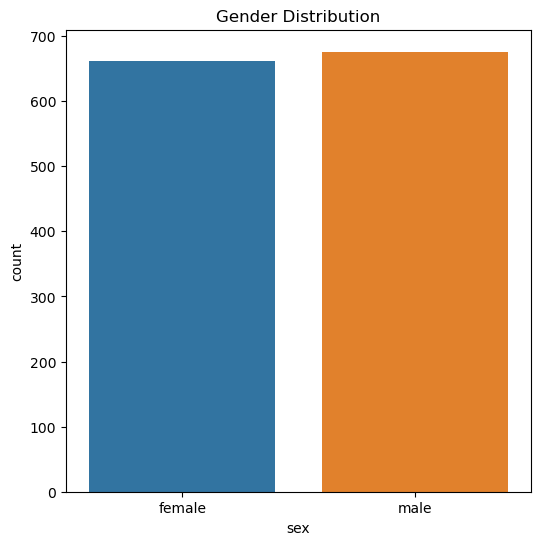

In [4]:
# Gender Distribution
plt.figure(figsize=(6, 6))
sns.countplot(x='sex', data=insurance_dataset)
plt.title('Gender Distribution')
plt.show()

<Figure size 600x600 with 0 Axes>

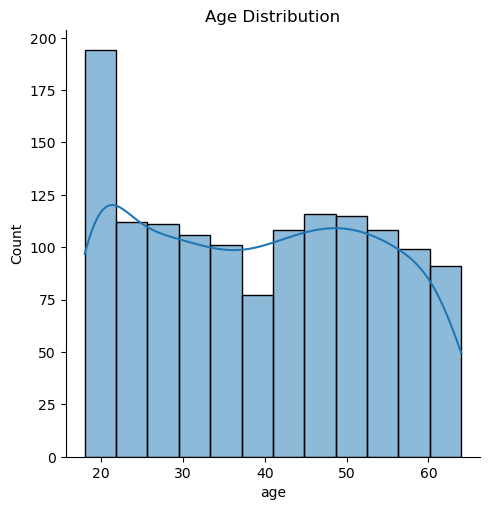

In [9]:
# Age Distribution
plt.figure(figsize=(6, 6))
sns.displot(insurance_dataset['age'], kde=True)
plt.title('Age Distribution')
plt.show()

In [10]:
# Encode categorical columns
insurance_dataset.replace({'sex': {'male': 0, 'female': 1}}, inplace=True)
insurance_dataset.replace({'smoker': {'yes': 0, 'no': 1}}, inplace=True)
insurance_dataset.replace({'region': {'southeast': 0, 'southwest': 1, 'northeast': 2, 'northwest': 3}}, inplace=True)

# Splitting features and target variable
X = insurance_dataset.drop(columns='charges', axis=1)
Y = insurance_dataset['charges']

In [11]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [12]:
# Train Random Forest Regressor
rfr = RandomForestRegressor(n_estimators=100, random_state=42)
rfr.fit(X_train, Y_train)

# Predictions and accuracy
rfr_train_pred = rfr.predict(X_train)
rfr_test_pred = rfr.predict(X_test)
rfr_r2_train = r2_score(Y_train, rfr_train_pred)
rfr_r2_test = r2_score(Y_test, rfr_test_pred)

print("--- Random Forest Results ---")
print(f"R² Score (Train): {rfr_r2_train:.2f}")
print(f"R² Score (Test): {rfr_r2_test:.2f}")

--- Random Forest Results ---
R² Score (Train): 0.98
R² Score (Test): 0.84


In [14]:
# Train Random Forest Regressor
rfr = RandomForestRegressor(n_estimators=100, random_state=42)
rfr.fit(X_train, Y_train)

# Predictions and accuracy
rfr_train_pred = rfr.predict(X_train)
rfr_test_pred = rfr.predict(X_test)
rfr_r2_train = r2_score(Y_train, rfr_train_pred)
rfr_r2_test = r2_score(Y_test, rfr_test_pred)

print("--- Random Forest Results ---")
print(f"R² Score (Train): {rfr_r2_train:.2f}")
print(f"R² Score (Test): {rfr_r2_test:.2f}")

--- Random Forest Results ---
R² Score (Train): 0.98
R² Score (Test): 0.84


In [15]:
# Train Linear Regression
lr = LinearRegression()
lr.fit(X_train, Y_train)

# Predictions and accuracy
lr_train_pred = lr.predict(X_train)
lr_test_pred = lr.predict(X_test)
lr_r2_train = r2_score(Y_train, lr_train_pred)
lr_r2_test = r2_score(Y_test, lr_test_pred)

print("--- Linear Regression Results ---")
print(f"R² Score (Train): {lr_r2_train:.2f}")
print(f"R² Score (Test): {lr_r2_test:.2f}")

--- Linear Regression Results ---
R² Score (Train): 0.75
R² Score (Test): 0.74


In [16]:
# Calculate accuracy metrics for Random Forest Regression
rfr_mae = mean_absolute_error(Y_test, rfr_test_pred)
rfr_mean_actual = np.mean(Y_test)
rfr_accuracy = 100 - (rfr_mae / rfr_mean_actual * 100)

# Calculate accuracy metrics for Linear Regression
lr_mae = mean_absolute_error(Y_test, lr_test_pred)
lr_mean_actual = np.mean(Y_test)
lr_accuracy = 100 - (lr_mae / lr_mean_actual * 100)

print("--- Accuracy Metrics ---")
print(f"Random Forest Accuracy: {rfr_accuracy:.2f}%")
print(f"Linear Regression Accuracy: {lr_accuracy:.2f}%")

# Determine the best model based on percentage accuracy
if rfr_accuracy > lr_accuracy:
    best_model_accuracy = "Random Forest Regression"
    best_accuracy = rfr_accuracy
else:
    best_model_accuracy = "Linear Regression"
    best_accuracy = lr_accuracy

print(f"The best model based on accuracy is: {best_model_accuracy} with an accuracy of {best_accuracy:.2f}%")

--- Accuracy Metrics ---
Random Forest Accuracy: 78.58%
Linear Regression Accuracy: 66.80%
The best model based on accuracy is: Random Forest Regression with an accuracy of 78.58%


In [17]:
# Compare models
if rfr_r2_test > lr_r2_test:
    best_model = "Random Forest Regression"
    best_prediction = rfr.predict
    best_r2 = rfr_r2_test
else:
    best_model = "Linear Regression"
    best_prediction = lr.predict
    best_r2 = lr_r2_test

print(f"The best model is: {best_model} with R² Score: {best_r2:.2f}")

The best model is: Random Forest Regression with R² Score: 0.84


In [18]:
# Example prediction
input_data = (31, 1, 25.74, 0, 1, 0)  # Example input
input_data_reshaped = np.asarray(input_data).reshape(1, -1)
prediction = best_prediction(input_data_reshaped)

print(f"The predicted insurance cost using {best_model} is USD {prediction[0]:.2f}")

The predicted insurance cost using Random Forest Regression is USD 3729.64


C:\Users\KOUSHIK GOURISETTY\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
